### Homework 1

Arnie Larson

EEP 506 

4/6/2022



In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

### Problem 1

In the first problem we are to look at the properties of the rectangular pulse and it's spectrum.  The $rect$ function and the $sinc$ function are a fourier pair.

$s(t) = rect(\frac{t}{T}) \rightarrow S(f) = T sinc( Tf)$

And the $rect$ function has a width $T$ and the sinc function has zero crossings at $ f =\pm n\frac{1}{T}$

In this problem make extensive use of the basic Fourier transform properties of 

Linearity: $\mathcal{F}[\alpha x_1(t) + \beta x_2(t)] = \alpha S_1(f) + \beta S_2(f)$

Time Shift: $\mathcal{F}[x(t-t_o)] = e^{-j2\pi f t_o} \mathcal{F}[x(t)]$

Scaling: $\mathcal{F}[x(at)] = \frac{1}{|a|} x(\frac{f}{a})$

It is found that for

i) $s(t) = rect(\frac{t-T/2}{T}) \rightarrow S(f) = e^{-j2\pi f \frac{T}{2}} T sinc(Tf)$ with $ ZCs: \frac{1}{T}, \frac{2}{T}, ...$

ii) $s(t) = rect(\frac{t}{W}) - rect(\frac{t - t_0}{W}); (t_0 > W) \rightarrow $

$S(f) = W ( 1 + e^{-j 2 \pi f t_0}) sinc ( Wf) $

$|S(f)| = 2W | cos ( \pi f t_0 ) | sinc(Wf) $

![Problem 1](img/PXL_20220405_163806261_2.jpg)

### Problem 2

Plotting the spectra of signals in problem 1 and calculating bandwidths as 90%, 95%, 99% of energy represented in the spectra

In [46]:
## integration routines
## sum 1/2*(y_k + y_k+1)* dt
def integrate(y, dt):
    N = y.size
    return np.sum((y[:N-1]+y[1:N])*dt/2)
    
def cumulate(y, dt):
    N = y.size
    c = np.cumsum((y[:N-1]+y[1:N])*dt/2)
    return c

In [47]:
p=np.array([1,2,3,4])
dt = 1
N = p.size
print("p: {}".format(p))
print("p[:N-1]: {}".format(p[:N-1]))
print("p[1:N]: {}".format(p[1:N]))
print("integrate(p): {}".format(np.sum((p[:N-1]+p[1:N])*dt/2)))

p: [1 2 3 4]
p[:N-1]: [1 2 3]
p[1:N]: [2 3 4]
integrate(p): 7.5


Frequency to fmax = 4, dt is 4e-05
Integration  to fmax = 0.4873693513155694


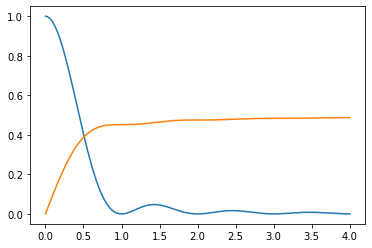

In [52]:
## rect(t-T / T); T=1, E = T^2
## Find 90, 95, 99 percent BW (where energy of S(f) >= 90% of total E)


T=1; N = 100000; fmax = 4; dt=fmax / N
f = np.linspace(0, fmax, N)
S = T**2 * np.sinc( T * f) **2
C = cumulate(S, dt)
print("Frequency to fmax = {}, dt is {}".format(fmax, dt))
print("Integration  to fmax = {}".format(integrate(S, dt)))

plt.plot(f, S, f[1:], C)


In [9]:
w=1; to = 2
f = np.linspace(-3, 3, 10000)
S = 2*w*np.abs(np.cos(np.pi*to*f))*np.abs(np.sinc(f))


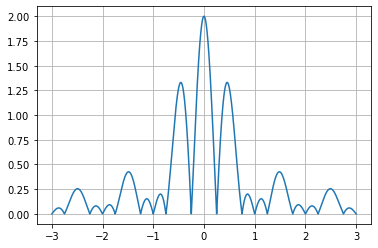

In [10]:
plt.plot(f, S)
plt.grid()